<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday60!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

df = pd.read_excel(path)
df.head()


,Customer ID,Age,Gender,Total Spent,Converted,Comments,Purchased Category,Stock,Region,Income Level,Discount Availed,Customer Tenure (Years),Campaign,Return Rate (%),Website Visit Frequency,Average Cart Value
0,1,23,F,150,1,Satisfied with the service,Clothing,4,East,Medium,46,4,Winter Sale,2.981829,3,378.00
1,2,35,M,600,1,Needs improvement in delivery,Beauty,86,West,Low,61,12,Summer Sale,1.833412,6,315.52
2,3,45,F,800,0,Regular customer,Books,24,North,Medium,50,12,Black Friday,6.547401,0,250.69
3,4,52,M,200,0,Occasional buyer,Beauty,10,East,Medium,54,7,Winter Sale,3.923717,1,222.58
4,5,29,F,300,1,High spender,Books,47,East,Medium,63,12,Winter Sale,2.306644,4,298.68


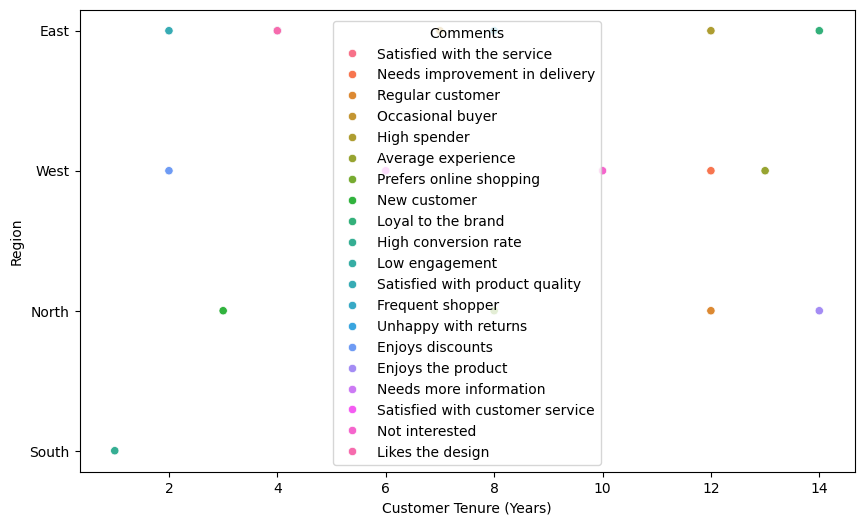

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer Tenure (Years)', y='Region', hue='Comments', data=df)
plt.show()

df.to_csv('data.csv', index=False)

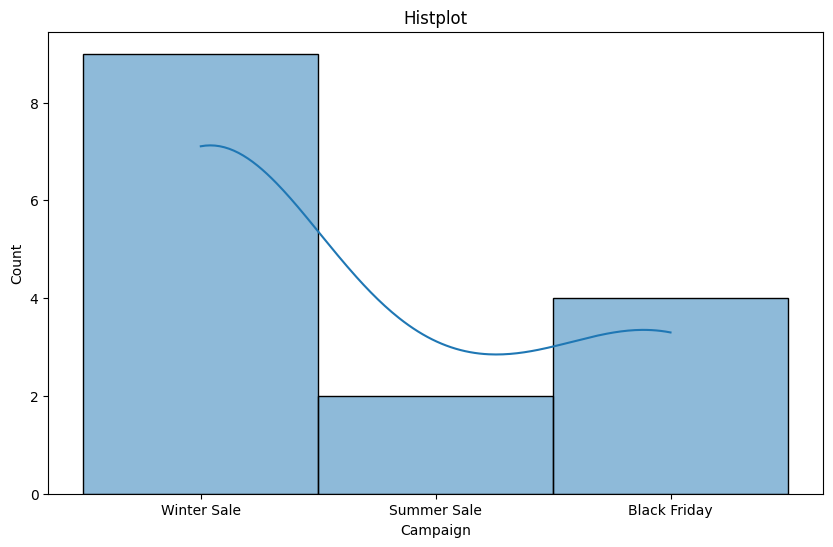

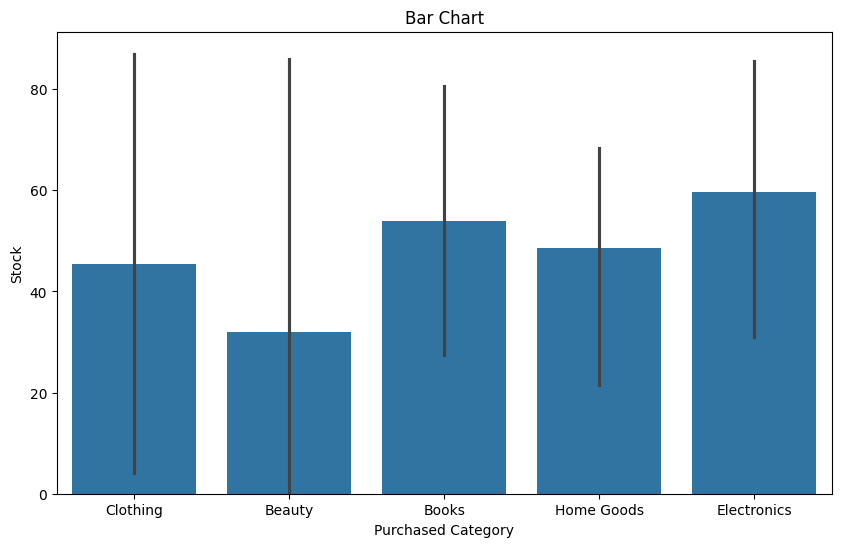

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Campaign'], kde=True)
plt.title('Histplot')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Purchased Category', y='Stock',data=df)
plt.title('Bar Chart')
plt.show()

In [8]:
df['age_group'] = pd.cut(df['Age'], bins=[18,25,35, 45, 55, 65],
                         labels=['18-25', '26-35', '36-45', '46-55', '56+'])

avg_spent_by_age_group = df.groupby('age_group')['Total Spent'].mean()
print(avg_spent_by_age_group)

age_group
18-25    280.000000
26-35    448.571429
36-45    598.333333
46-55    337.500000
56+             NaN
Name: Total Spent, dtype: float64


<ipython-input-8-83fb4c33c347>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spent_by_age_group = df.groupby('age_group')['Total Spent'].mean()


In [9]:
def classify_comments(comment):
   positive_keywords = ['satisfied', 'loyal', 'enjoys']
   return 'Positive' if any(word in comment.lower() for word in positive_keywords) else 'Negative'


df['Feedback Category'] = df['Comments'].apply(classify_comments)

feedback_counts = df['Feedback Category'].value_counts()
print(feedback_counts)
print(df.columns)

Feedback Category
Negative    14
Positive     6
Name: count, dtype: int64
Index(['Customer ID', 'Age', 'Gender', 'Total Spent', 'Converted', 'Comments',
       'Purchased Category', 'Stock', 'Region', 'Income Level',
       'Discount Availed', 'Customer Tenure (Years)', 'Campaign',
       'Return Rate (%)', 'Website Visit Frequency', 'Average Cart Value',
       'age_group', 'Feedback Category'],
      dtype='object')


In [10]:
print(df.describe())

       Customer ID        Age  Total Spent  Converted      Stock  \
count     20.00000  20.000000    20.000000  20.000000  20.000000   
mean      10.50000  36.650000   446.000000   0.600000  49.200000   
std        5.91608   9.178206   201.138863   0.502625  33.282839   
min        1.00000  23.000000   120.000000   0.000000   0.000000   
25%        5.75000  28.750000   297.500000   0.000000  19.000000   
50%       10.50000  35.500000   425.000000   1.000000  51.000000   
75%       15.25000  42.750000   602.500000   1.000000  85.250000   
max       20.00000  52.000000   800.000000   1.000000  92.000000   

       Discount Availed  Customer Tenure (Years)  Return Rate (%)  \
count          20.00000                20.000000        20.000000   
mean           39.60000                 7.300000         4.599323   
std            28.84514                 4.341962         1.852821   
min             1.00000                 1.000000         1.833412   
25%            11.75000                 4.

In [11]:
text_data = df['Comments']
print(text_data.head())

0       Satisfied with the service
1    Needs improvement in delivery
2                 Regular customer
3                 Occasional buyer
4                     High spender
Name: Comments, dtype: object
